In [1]:
from __future__ import division
import os
import sys

from glob import glob

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

from psycopg2 import connect

In [28]:
allGwas = pd.read_csv('/DATA/raw/dbpshp/egrasp_results.txt', sep='\t')
allGwas['chrom'] = allGwas.apply(lambda x:'chr{}'.format(x['chrom']), axis=1)
print allGwas.shape

(82443, 12)


In [32]:
allGwas.head()

,chrom,chrom_pos,snpid_in_dbsnp,snpid_in_paper,pmid,pvalue,phenotype,paper_phenotype_description,paper_phenotype_categories,title,in_gene,dbsnp_fx
0,chr1,1140435,1815606,rs1815606,20686565,0.021010,Total cholesterol,Lipid level measurements,CVD risk factor (CVD RF);Lipids,"Biological, clinical and population relevance ...",(TNFRSF18),Intron
1,chr1,1140435,1815606,rs1815606,19060906,0.019390,Triglycerides,Lipid level measurements,CVD risk factor (CVD RF);Lipids,Common variants at 30 loci contribute to polyg...,(TNFRSF18),Intron
2,chr1,1140435,1815606,rs1815606,22685416,0.000015,Gene expression of TNFRSF18 (probeID ILMN_2349...,Gene expression in brain (cerebellum and tempo...,Quantitative trait(s);Gene expression (RNA);Neuro,Brain expression genome-wide association study...,(TNFRSF18),Intron
3,chr1,1140435,1815606,rs1815606,20339536,0.024021,Total cholesterol change with statins,"Response to statin treatment (simvastatin, pra...",Drug response;Quantitative trait(s);CVD risk f...,Genome-wide association of lipid-lowering resp...,(TNFRSF18),Intron
4,chr1,1140435,1815606,rs1815606,22295056,0.009550,Acute lung injury following major trauma,Acute lung injury following major trauma,Pulmonary;Wound,Genome wide association identifies PPFIA1 as a...,(TNFRSF18),Intron


In [34]:
dbpshp = pd.read_csv('/DATA/raw/dbpshp/dbpshp_ep.txt', sep='\t')
dbpshp['chrom_pos'] = dbpshp['cpos_m1']+1
print dbpshp.shape

(23833, 17)


In [35]:
dbpshp.head()

,A,C,G,T,chrom,cpos_m1,rsid,ref,ref_af,ref_ep,alt,alt_af,alt_ep,lo_nuc,lo_af,lo_ep,chrom_pos
0,0.023993,0.023966,0.928076,0.023966,chr10,101133998,rs4919305,T,0.616214,0.023966,G,0.383786,0.928076,T,0.616214,0.023966,101133999
1,0.012806,0.012806,0.961488,0.012899,chr10,101137062,rs3829211,G,0.529553,0.961488,A,0.470447,0.012806,A,0.470447,0.012806,101137063
2,0.019247,0.923048,0.019275,0.038430,chr10,102553994,rs1006544,C,0.400958,0.923048,T,0.599042,0.038430,T,0.599042,0.038430,102553995
3,0.016269,0.951127,0.016278,0.016325,chr10,102587573,rs12098288,T,0.625200,0.016325,C,0.374800,0.951127,T,0.625200,0.016325,102587574
4,0.035002,0.939107,0.012945,0.012945,chr10,102602125,rs2476973,A,0.681510,0.035002,C,0.318490,0.939107,A,0.681510,0.035002,102602126


In [36]:
comb = allGwas.merge(dbpshp, on=['chrom','chrom_pos'], how='outer')
print comb.shape

(85796, 27)


0.05
1      3494
2      3826
3      3675
4      3044
5      2228
6      1483
7       957
8       651
9       385
10      244
11      193
12      123
13       78
14       49
15       45
16       40
17       25
18       30
19       14
20        8
21        8
22       20
23        2
24        6
25        4
26        5
27        5
28        1
29        4
31        5
32        2
33        1
35        1
36        1
37        1
38        1
39        2
42        1
52        2
66        1
93        1
153       1
Name: snpid_in_dbsnp, dtype: int64
1e-05
1      2061
2       749
3       330
4       186
5       104
6        60
7        59
8        26
9        30
10       15
11       10
12       12
13        1
14        5
15        1
16        5
17       13
18        4
19        4
20        2
21        3
22        1
23        2
24        1
25        2
40        1
42        1
49        1
58        1
132       1
Name: snpid_in_dbsnp, dtype: int64
1e-10
1     795
2     238
3     100
4      70
5      28

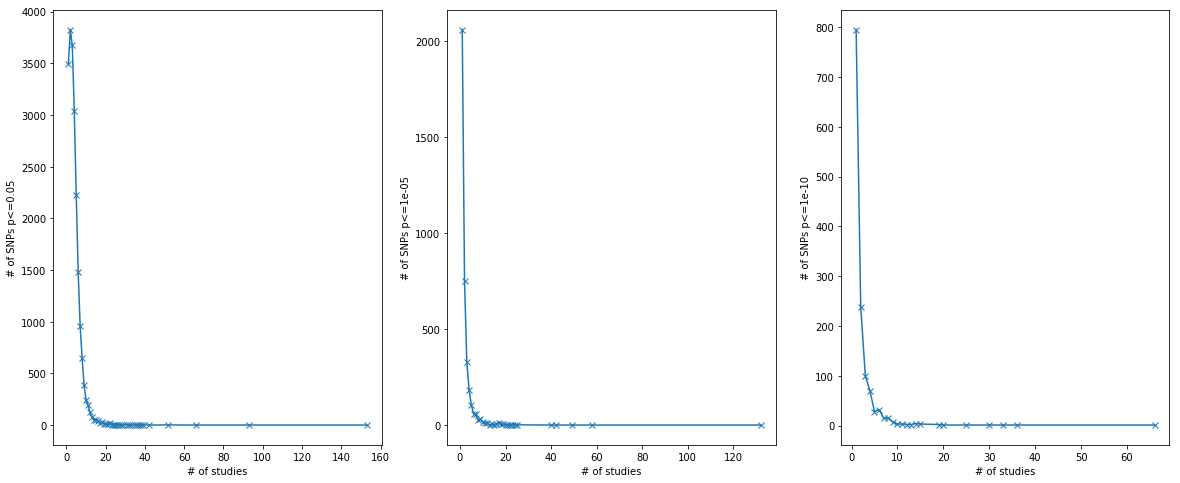

In [47]:
fig,axes = plt.subplots(1,3, figsize=(20,8), facecolor='#FFFFFF')

pThresholds = [0.05, 1e-5, 1e-10]

for i, pThreshold in enumerate(pThresholds):
    print pThreshold
    tmp = allGwas[allGwas['pvalue']<=pThreshold]
    counts = tmp['snpid_in_dbsnp'].value_counts()
    countsCount = counts.value_counts().sort_index()
    
    ax = axes[i]
    ax.plot(countsCount.index, countsCount.values, marker='x')
    ax.set_xlabel('# of studies')
    ax.set_ylabel('# of SNPs p<={}'.format(pThreshold))
    
    print countsCount

0.05
1      2203
2      2421
3      2305
4      1950
5      1444
6       982
7       659
8       401
9       242
10      155
11      131
12       81
13       56
14       30
15       27
16       29
17       11
18       16
19       12
20        4
21        4
22       11
23        2
24        2
25        4
26        4
27        3
28        1
29        1
31        4
32        1
33        1
35        1
36        1
37        1
39        2
42        1
52        2
66        1
93        1
153       1
Name: snpid_in_dbsnp, dtype: int64
1e-05
1      1315
2       465
3       224
4       112
5        72
6        35
7        38
8        14
9        20
10       10
11        5
12        6
14        3
15        1
16        4
17        7
18        3
19        2
20        1
21        1
22        1
23        2
24        1
25        2
40        1
42        1
49        1
58        1
132       1
Name: snpid_in_dbsnp, dtype: int64
1e-10
1     514
2     148
3      64
4      39
5      17
6      19
7      11
8  

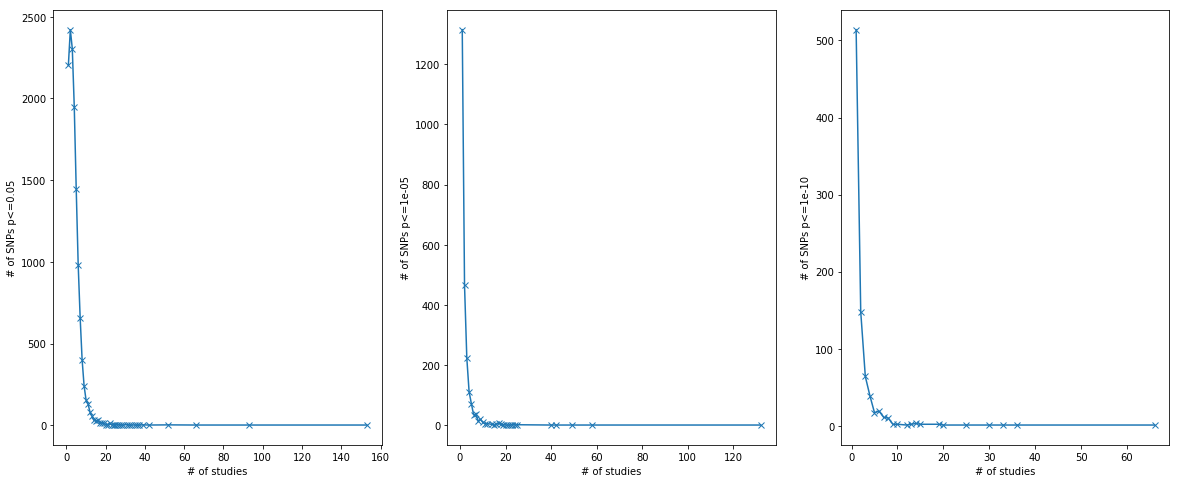

In [48]:
fig,axes = plt.subplots(1,3, figsize=(20,8), facecolor='#FFFFFF')

pThresholds = [0.05, 1e-5, 1e-10]

for i, pThreshold in enumerate(pThresholds):
    print pThreshold
    tmp = comb[(comb['pvalue']<=pThreshold) & (comb['lo_ep']<0.05)]
    counts = tmp['snpid_in_dbsnp'].value_counts()
    countsCount = counts.value_counts().sort_index()
    
    ax = axes[i]
    ax.plot(countsCount.index, countsCount.values, marker='x')
    ax.set_xlabel('# of studies')
    ax.set_ylabel('# of SNPs p<={}'.format(pThreshold))
    
    print countsCount

In [46]:
comb.to_csv('/DATA/raw/dbpshp/all-gwas_ep.txt', sep='\t', index=False)

In [50]:
pd.unique(comb[comb['lo_ep']<0.05]['rsid']).shape

(15156,)